In [8]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sb
import re

In [9]:
train_input_path = "/kaggle/input/titanic/train.csv"
test_input_path = "/kaggle/input/titanic/test.csv"

In [11]:
train_df = pd.read_csv(train_input_path)
test_df = pd.read_csv(test_input_path)

print(train_df.columns)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [18]:
train_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


Text(0.5, 1.0, 'Distribution of Missing Values')

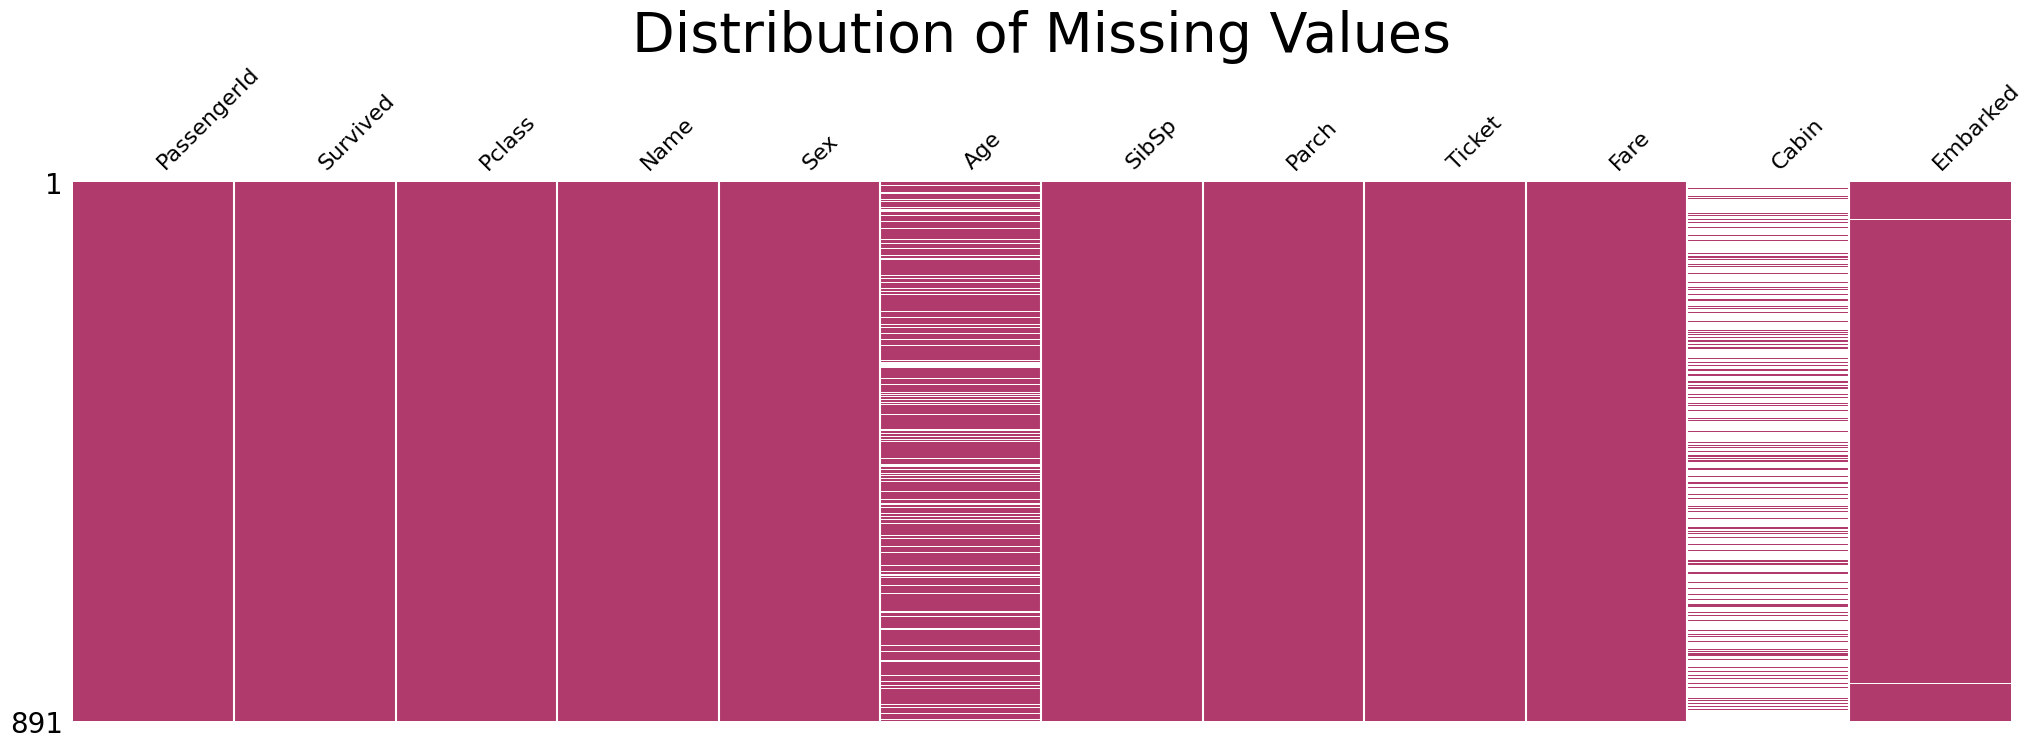

In [12]:
msno.matrix(train_df, sparkline=False, figsize=(25,7), color=(0.69,0.23,0.42))
plt.title('Distribution of Missing Values', fontsize=40)

In [13]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [14]:
features = ["Pclass","Sex","Embarked","SibSp","Parch"]
def change_type(df, features):
  for feature in features:
    df[feature] = df[feature].astype("category")
change_type(train_df,features)
change_type(test_df,features)
     

In [15]:

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(6), float64(2), int64(1), object(3)
memory usage: 48.3+ KB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    category
 6   Parch        418 non-null    category
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(1), object(3)
memory usage: 22.8+ KB


In [17]:
def regExName(name):
  x = re.search(",([\w\s]+)\.", name).groups(1)[0]
  return x.strip()
train_df['Title'] = train_df['Name'].apply(lambda name : regExName(name))
test_df['Title'] = test_df['Name'].apply(lambda name : regExName(name))
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [19]:
def change_title(title):
  titles = ['Mr','Miss','Mrs','Master']
  if title in titles:
    return title
  elif title == 'Ms':
    return 'Miss'
  else:
    return 'Others'
#print("A") if a > b else print("B")
train_df['Title'] = train_df['Title'].apply(lambda title: change_title(title))

train_df['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64

In [20]:
test_df['Title'] = test_df['Title'].apply(lambda title : change_title(title))
test_df['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: count, dtype: int64

In [21]:
train_df['Family_Size'] = train_df['SibSp'].astype('int64') + train_df['Parch'].astype('int64')+1
train_df.tail(15)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,Mr,1
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,Mr,1
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Mr,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Mrs,2
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,Mrs,2
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,Mr,1
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,Miss,1
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,Mr,1
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Mrs,6


In [22]:
test_df['Family_Size'] = test_df['SibSp'].astype('int64') + test_df['Parch'].astype('int64')+1

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Family_Category', ylabel='count'>

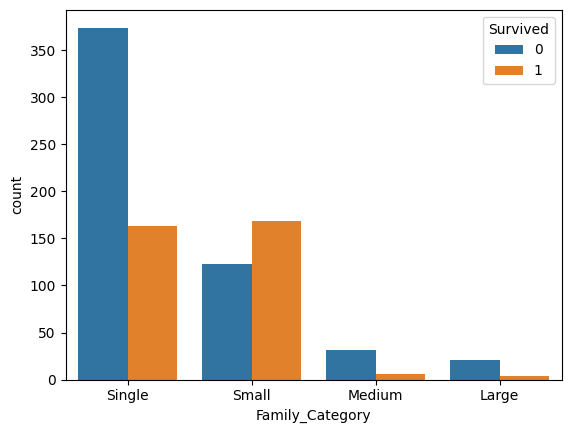

In [23]:
train_df['Family_Category']=pd.cut(train_df['Family_Size'],bins = [0,1,4,6,20],labels=['Single','Small','Medium','Large'])
sb.countplot(data = train_df,x = 'Family_Category',hue = 'Survived')

In [24]:
test_df['Family_Category']=pd.cut(test_df['Family_Size'],bins = [0,1,4,6,20],labels=['Single','Small','Medium','Large'])

In [25]:
num_features = ['Age','Fare']
cat_features = ['Pclass','Sex','Embarked','Title','Family_Category']

features_cols = num_features + cat_features
print(features_cols)

['Age', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Title', 'Family_Category']


In [26]:
def display_missing(df,features_cols):
  num_rows = df.shape[0]
  for col in features_cols:
    missing = df[col].isnull().sum()
    if missing > 0:
      print(f"Col {col} has {missing * 100 / num_rows:.2f}% missing percent")

display_missing(train_df,features_cols)
display_missing(test_df,features_cols)

Col Age has 19.87% missing percent
Col Embarked has 0.22% missing percent
Col Age has 20.57% missing percent
Col Fare has 0.24% missing percent


In [32]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'], observed=False)['Age'].apply(lambda age: age.fillna(age.median())).reset_index(level=[0,1], drop=True)
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'], observed=False)['Age'].apply(lambda age: age.fillna(age.median())).reset_index(level=[0,1], drop=True)

In [33]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,1,Single
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,Single
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,Miss,4,Small
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,Single


In [34]:
X = train_df[features_cols]
y = train_df['Survived']
X_test = test_df[features_cols]

In [35]:

#import libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [36]:
#preprocessing
# use pipeline to fill missing and normalization data for numerical and categorical features
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy ='median')),
    ('scaler',StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy ='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [37]:
# use columnTransformer to transform features_col for categorical and numericl
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])

In [38]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked', 'Title',
                                  'Family_Category'])])

In [39]:
X = preprocessor.transform(X) # X = X transform

In [40]:
X_test = preprocessor.transform(X_test)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [43]:
# libraries
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [46]:
# use gridsearchCv to find best Parameters
#code
grid_params = { 'n_neighbors' : [5,7,9,11,13,15,20,25,30],
               'weights' : ['uniform','distance']
               }

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid = grid_params,scoring='accuracy',n_jobs=-1,refit=True,cv=5)
clf.fit(x_train, y_train)

knnBestParam = clf.best_params_
print(knnBestParam)
knnBestScore = clf.best_score_
print(knnBestScore)

{'n_neighbors': 7, 'weights': 'uniform'}
0.8258938244853737


In [48]:
model = KNeighborsClassifier(n_neighbors=13,weights= 'uniform')
model.fit(x_train,y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(metrics.precision_score(y_val, y_pred,average='macro'))
print(metrics.recall_score(y_val, y_pred,average='macro'))
print(metrics.f1_score(y_val, y_pred,average='macro'))

0.8100558659217877
0.8012820512820513
0.794137022397892
0.7972414712153517


In [49]:
pred = model.predict(X_test)

In [52]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_Category
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,Single
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,Small
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,Single
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,Single
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,1,Single
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Others,1,Single
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1,Single
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S,Mr,1,Single


In [50]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [55]:
print(len(pred))  # Kiểm tra số lượng phần tử của pred
print(test_df.shape)  # Kiểm tra số lượng dòng của test_df


418
(418, 14)


In [56]:
final_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': pred.flatten()  # Đảm bảo pred là mảng 1D
})

In [57]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [58]:
final_df.to_csv('submission.csv', index=False)
